<a href="https://colab.research.google.com/github/Roberto-cpu/Corso_Fuzzy_2021/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# ***Cos'è la logica?***
## Introduzione alla logica
<br>
La logica può essere definita come lo studio del ragionamento e dell'argomentazione, capace di definire la correttezza dei procedimenti del pensiero.<br>
Il termine "Logica" nasce nella filosofia antica, successiva alla dottrina aristotelica, prendendo il significato di: "ciò che concerne la ragione".<br>
Durante questo corso è stato possibile analizzare due differenti tipologie di logica: logica classica e logica polivalente.<br>
Entrambe le tipologie di logica basano la correttezza del ragionamento sul valore restituito da specifici operatori, detti operatori logici.
Differenza sostanziale tra le due logiche è il grado di verità considerato:

*   la logica classica si basa sulla concezione di due possibili gradi di verità: Vero e Falso;
*   la logica polivalente si basa sulla concezione di diversi gradi di verità, superiori ai canonici Vero/Falso.<br>
Per tale concezione è possibile vedere la logica polivalente come un'estensione della logica classica.<br>
Alla logica polivalente appartiene la logica Fuzzy (o logica sfumata), con la quale è possibile definire un grado di verità che si iterpone tra Vero e Falso.
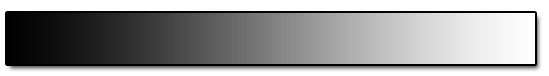

## Implementazione degli operatori logici
<br>
In questa prima fase si andranno ad implementare alcuni operatori logici: and, or, not, implicazione, equivalenza e xor.<br>
Verranno applicate la logica di Boole e la logica di Lukasiewicz.<br>
I valori di verità (True e False) verranno rappresentanti dai valori binari 1 (True) e 0 (False).

Nell'AND, a differenza degli altri operandi, non viene richiesta la logica da applicare, in quanto l'operazione effettuata resta invariata.

In [8]:
# This method return's the AND operation between two values
def and_agent(op1, op2):
  return int(not(not op1 or not op2))

# This method return's the OR operation between two values
def or_agent(op1, op2, logic):
  if logic == "Boole":
    return op1 or op2
  else:
    return max(op1, op2)

# This method return's the IMPLCATION operation between two values
def implication_agent(hypotesis, thesis, logic):
    if logic == "Boole":
      return int(not hypotesis or thesis)
    else:
      return min(1, 1 - hypotesis + thesis)

# This method return's the XOR operation between two values
def xor_agent(op1, op2, logic):
  if logic == "Boole":
    return int((not op1 and op2) or (op1 and not op2))
  else:
    return abs(op1 - op2)

# This method return's the NOT operation of a operator
def not_agent(op, logic):
  if logic == "Boole":
    return int(not op)
  else:
    return (1 - op)

# This method return's the Equivalence operation's result between two values
def equivalence_agent(op1, op2, logic):
  if logic == "Boole":
    return int(not ((not op1 and op2) or (op1 and not op2)))
  else:
    return (1 - abs(op1 - op2))

In [ ]:
# This method returns the agent's symbol
def symbol(agent):
  if agent == "and_agent":
    return "and"
  elif agent == "or_agent":
    return "or"
  elif agent == "implication_agent":
    return "->"
  elif agent == "xor_agent":
    return "xor"
  else:
    return "<=>"

In [ ]:
# This method prints a truth table for the chosen operation and logic
def print_table(function):
    possible_values = (0, 1)

    logics = ("Boole", "Lukasiewicz")
    agents = ("and_agent", "or_agent", "not_agent", "implication_agent", "xor_agent", "equivalence_agent")

    # If the agent is not recognized, it must be enter it again
    while function not in agents:
      function = input("Operazione non rinconosciuta!\nInserisci l'operazione da effettuare (and, or, not, implication, xor, equivalence): ")   
      function += "_agent"

    # --- There are two versions of the print function because the NOT agent needs only one operand --- 

    if function == "not_agent":
      logic = input("Definisci la logica da applicare (Boole, Lukasiewicz): ")
      # If the logic is not recognized, it must be enter it again
      while logic.capitalize() not in logics:
        logic = input("La logica richiesta non è riconosciuta!\nDefinisci la logica da applicare (Boole, Lukasiewicz): ")
      print("A | not A")
      for A in possible_values:
        print(f'{A} |   {eval(function+"(A, logic)")}')

    else:
      if function == "and_agent":
        print(f'A | B | A {symbol(function)} B')
        for A in possible_values:
            for B in possible_values:
                print(f'{A} | {B} |   {eval(function+"(A, B)")}')
      else:
        logic = input("Definisci la logica da applicare (Boole, Lukasiewicz): ")
        # If the logic is not recognized, it must be enter it again
        while logic.capitalize() not in logics:
          logic = input("La logica richiesta non è riconosciuta!\nDefinisci la logica da applicare (Boole, Lukasiewicz): ")
        print(f'A | B | A {symbol(function)} B')
        for A in possible_values:
            for B in possible_values:
                print(f'{A} | {B} |   {eval(function+"(A, B, logic)")}')     

In [ ]:
def main():
  execute = "si"
  while execute == "si":
    agent = input("Inserisci l'operazione da effettuare (and, or, not, implication, xor, equivalence): ")
    print_table(agent+"_agent")
    execute = input("Vuoi eseguire una nuova operazione (si/no)? ")
  
  print("Esecuzione terminata!\nArrivederci.")

In [ ]:
main()

Inserisci l'operazione da effettuare (and, or, not, implication, xor, equivalence): and
A | B | A and B
0 | 0 |   0
0 | 1 |   0
1 | 0 |   0
1 | 1 |   1
Vuoi eseguire una nuova operazione (si/no)? si
Inserisci l'operazione da effettuare (and, or, not, implication, xor, equivalence): not
Definisci la logica da applicare (Boole, Lukasiewicz): Bool
La logica richiesta non è riconosciuta!
Definisci la logica da applicare (Boole, Lukasiewicz): Boole
A | not A
0 |   1
1 |   0
Vuoi eseguire una nuova operazione (si/no)? si
Inserisci l'operazione da effettuare (and, or, not, implication, xor, equivalence): implication
Definisci la logica da applicare (Boole, Lukasiewicz): Lukasiewicz
A | B | A -> B
0 | 0 |   1
0 | 1 |   1
1 | 0 |   0
1 | 1 |   1
Vuoi eseguire una nuova operazione (si/no)? si
Inserisci l'operazione da effettuare (and, or, not, implication, xor, equivalence): or
Definisci la logica da applicare (Boole, Lukasiewicz): Boole
A | B | A or B
0 | 0 |   0
0 | 1 |   1
1 | 0 |   1
1 | 1 |

In questo esercizio verranno definite le funzioni utili al calcolo della logia trivalente. Tale logica impone l'uso di tre valori di verità (Vero, Non definito, Falso), i quali verrano tradotti nei valori 1 (Vero), 0 (Non definito) e -1 (Falso).

In [5]:
def and_three_values(op1, op2):
    return min(op1, op2)
  
def or_three_values(op1, op2):
  return max(op1, op2)

def not_three_values(op1):
  if op1 == 1:
    return -1
  elif op1 == -1:
    return 1
  
def implication_three_values(op1, op2):
  if op1 == op2:
    if op1 == 1 or op1 == -1:
      return 1
    elif op1 == 0:
      return 0
  elif op1 > op2:
    if op1 == 1:
      return min(op1, op2)
    elif op1 == 0:
      return 0
  elif op2 > op1:
    return 1

In [6]:
def chooseSymbol(agent):
  if agent.startswith("and"):
    return "and"
  elif agent.startswith("or"):
    return "or"
  else:
    return "->"

In [7]:
def print_table_three_values(logic):
  possible_values = (1, 0, -1)
  
  boole_op = ("and", "or", "not")
  lukasiewicz_op = ("implication", "equivalence")

  if logic == "Boole":
    agent = input("Quale operazione vuoi fare (and, or, not)? ")
    while agent not in boole_op:
      agent = input("Quale operazione vuoi fare (and, or, not)? ")
    agent += "_three_values"
  else:
    agent = "implication_three_values"

  print(agent)

  if agent == "not_three_values":
    print("A | not A")
    for A in possible_values:
      print(f'{A} | {eval(agent+"(A)")}')
  else:
    print (f'A  | B  | A {chooseSymbol(agent)} B')
    for A in possible_values:
      for B in possible_values:
        print(f'{A}  | {B}  | {eval(agent+"(A, B)")}')


In [10]:
def main():
  choose = "si"
  logics = ("Boole", "Lukasiewicz")
  options = ("si", "no")

  while choose == "si":
    logic = input("Quale logica vuoi applicare (Boole, Lukasiewicz)? ")
    while logic not in logics:
      logic = input("Quale logica vuoi applicare (Boole, Lukasiewicz)? ")
    print_table_three_values(logic)
    choose = input("Vuoi effettuare un'altra operazione (si/no)? ")
    while choose not in options:
      choose = input("Vuoi effettuare un'altra operazione (si/no)? ")

  print("Arrivederci!")

In [9]:
main()

Quale logica vuoi applicare (Boole, Lukasiewicz)? Lukasiewicz
implication_three_values
A  | B  | A -> B
1  | 1  | 1
1  | 0  | 0
1  | -1  | -1
0  | 1  | 1
0  | 0  | 0
0  | -1  | 0
-1  | 1  | 1
-1  | 0  | 1
-1  | -1  | 1
Vuoi effettuare un'altra operazione (si/no)? si
Quale logica vuoi applicare (Boole, Lukasiewicz)? Boole
Quale operazione vuoi fare (and, or, not)? or
or_three_values
A  | B  | A or B
1  | 1  | 1
1  | 0  | 1
1  | -1  | 1
0  | 1  | 1
0  | 0  | 0
0  | -1  | 0
-1  | 1  | 1
-1  | 0  | 0
-1  | -1  | -1
Vuoi effettuare un'altra operazione (si/no)? no
Arrivederci!


In questo esercizio si vuole sviluppare l'operazione not A or not A.<br>
Per far ciò si eseguirà un ciclo for sulla sola variabile A per i possibili valori che questa può assumere (0 e 1).<br>
Risultato di questo snippet sarà la stampa della tabella di verità contente i valori assunto dalla variabile A, dalla sua negazione (not A) ed il risultato dell'OR.

In [12]:
import matplotlib.pyplot as plt

def main():
  possible_values = (0, 1)
  print('A | not A| A or not A')
  for A in possible_values:
    print(f'{A} |  {int(not A)}   |   {or_agent(A, int(not A), "Boole")}')

A | not A| A or not A
0 |  1   |   1
1 |  0   |   1


In questo esercizio si vuole sviluppare l'operazione not A -> B.<br>
Per far ciò si eseguirà un ciclo for su due variabili A e B per i possibili valori che queste possono assumere (0 e 1).<br>
Risultato di questo snippet sarà la stampa della tabella di verità contente i valori assunto dalla variabile A, e dalla sua negazione (not A), i valori assunti dalla variabile B ed il risultato dell'IMPLICAZIONE.

In [18]:
possible_values = (0, 1)
print("A | B | not A | not A -> B")
for A in possible_values:
  for B in possible_values:
    print(f'{A} | {B} |   {int(not A)}   |      {implication_agent(int(not A), B, "Boole")}')

A | B | not A | not A -> B
0 | 0 |   1   |      0
0 | 1 |   1   |      1
1 | 0 |   0   |      1
1 | 1 |   0   |      1
